<h1 style="color: blue; text-align: center; font-size: 30px;"><b>Linear Regression and Its Applications</b></h1>

## **Overview**
Linear Regression is a statistical method used to model and analyze the relationship between one dependent variable (target) and one or more independent variables (predictors). It assumes a linear relationship between the variables and aims to find the best-fitting line that minimizes the error between the actual and predicted values.

---

<img src="Annotation 2025-01-15 153507.png" alt="Linear Regression Diagram" width="400">

- **Types**:
  1. **Simple Linear Regression**: One independent variable.
  2. **Multiple Linear Regression**: More than one independent variable.

---

## **Applications of Linear Regression**

### 1. **Business and Economics**
- **Sales Forecasting**: Predicting future sales based on past data.
- **Pricing Strategies**: Determining the impact of price changes on sales.
- **Market Trend Analysis**: Evaluating the effect of economic factors on business performance.

### 2. **Healthcare**
- **Medical Predictions**: Estimating patient outcomes, such as disease progression or recovery time.
- **Drug Effectiveness**: Analyzing the relationship between dosage and patient response.

### 3. **Real Estate**
- **Property Valuation**: Predicting house prices based on features like location, size, and number of bedrooms.
- **Rental Predictions**: Estimating rental costs based on market trends.

### 4. **Education**
- **Student Performance**: Analyzing the effect of study hours and attendance on grades.
- **Retention Rates**: Predicting dropout rates based on student demographics and performance.

### 5. **Finance**
- **Stock Market Analysis**: Modeling stock prices based on historical data and market indicators.
- **Risk Assessment**: Estimating credit risk for loans.

### 6. **Manufacturing and Production**
- **Demand Forecasting**: Predicting production needs based on market demand.
- **Process Optimization**: Understanding the relationship between inputs (e.g., raw materials) and outputs (e.g., finished goods).

### 7. **Marketing**
- **Ad Effectiveness**: Evaluating the impact of advertising spend on customer engagement.
- **Customer Behavior Analysis**: Predicting purchase patterns based on customer demographics.

### 8. **Environmental Studies**
- **Climate Change Analysis**: Modeling temperature or sea-level changes over time.
- **Pollution Studies**: Estimating pollutant levels based on industrial activities.

---

## **Advantages**
- Simple and interpretable.
- Efficient for small to medium datasets.
- Suitable for understanding the relationship between variables.

---

## **Limitations**
- Assumes linearity between variables.
- Sensitive to outliers.
- Ineffective for datasets with high multicollinearity or non-linear relationships.


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [7]:
df=pd.read_csv("advertising.csv")

In [9]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
df.shape

(200, 4)

In [17]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [31]:
# Extract features and target
X = df[['TV', 'Radio', 'Newspaper']]  # Only using TV for simplicity
y = df['Sales']

In [58]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the test data (to avoid data leakage)
X_test_scaled = scaler.transform(X_test)

In [62]:
# Apply Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [64]:
# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 2.907756910271092
R-squared Score: 0.9059011844150826


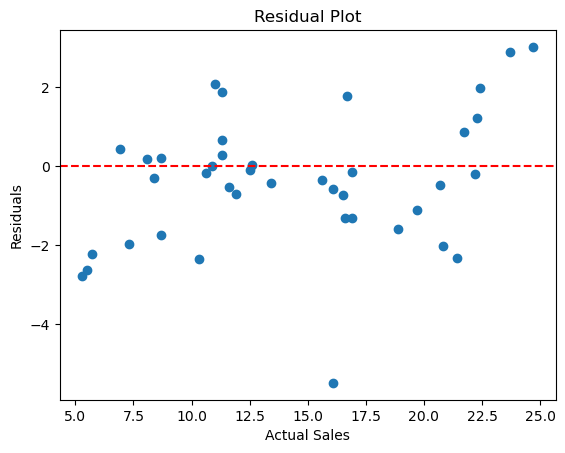

In [66]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_test - y_pred)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


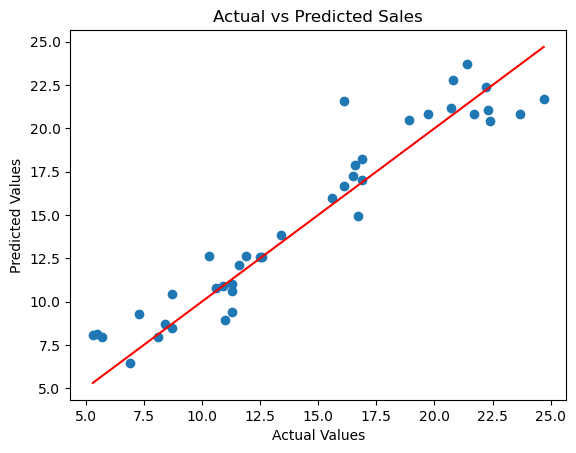

In [70]:
# Step 3: Visualize the Predictions (Optional)
import matplotlib.pyplot as plt

# Plot Actual vs Predicted values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Sales')
plt.show()


### New data for prediction (example: TV, Radio, Newspaper)

In [83]:
new_data = np.array([[100, 25, 50]])  # Example values for TV, Radio, Newspaper

# Step 1: Scale the new data using the same scaler fitted on the training data
new_data_scaled = scaler.transform(new_data)

# Step 2: Use the trained model to predict the sales
predicted_sales = model.predict(new_data_scaled)

# Output the predicted sales as a single value (not an array)
print(f"Predicted Sales: {predicted_sales[0]}")

Predicted Sales: 12.905519886861706


In [85]:
new_data = np.array([[200, 30, 40]])  # TV = 200, Radio = 30, Newspaper = 40  # Example values for TV, Radio, Newspaper

# Step 1: Scale the new data using the same scaler fitted on the training data
new_data_scaled = scaler.transform(new_data)

# Step 2: Use the trained model to predict the sales
predicted_sales = model.predict(new_data_scaled)

# Output the predicted sales as a single value (not an array)
print(f"Predicted Sales: {predicted_sales[0]}")

Predicted Sales: 18.817807314328125
